In [1]:
import scipy.io
import mat73
# Import to a python dictionary
mat = scipy.io.loadmat("./example_data/2022_11_03/2022_11_03_KeywordReading_Overt.mat")
#mat = mat73.loadmat(r"C:\Users\12240\BCI\KeywordReading\timings\2022_09_22_KeywordReading_Overt_timings.mat")
mat.items()
#mat.keys()

dict_items([('__header__', b'MATLAB 5.0 MAT-file Platform: nt, Created on: Fri Aug  2 20:27:12 2024'), ('__version__', '1.0'), ('__globals__', []), ('fs', array([[1000]])), ('ecog', array([[ 18.75,  30.75,   2.75, ..., -16.25,  -9.  ,   3.75],
       [ 19.  ,  27.25,   2.  , ..., -17.25, -12.  ,   5.5 ],
       [ 19.25,  30.  ,   1.5 , ..., -15.  , -16.25,   1.  ],
       ...,
       [-48.5 , -38.5 , -32.5 , ...,  -7.75, -11.25, -40.  ],
       [-57.25, -45.  , -44.5 , ...,  -9.25, -12.5 , -41.  ],
       [-65.  , -43.25, -43.25, ..., -14.75, -13.75, -49.5 ]])), ('audio', array([[-0.915558,  2.136302, -1.373337, ..., -2.288895, -0.457779,
        -1.068151]]))])

In [1]:
def read_lab_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    data = []
    for line in lines:
        parts = line.strip().split()
        if len(parts) == 2:
            timestamp, label = parts
            data.append((float(timestamp), label))
        elif len(parts) == 3:
            start_time, end_time, label = parts
            data.append((float(start_time), float(end_time), label))
    
    return data

file_path = r"./example_data/2022_11_03/KeywordReading_Overt_R01_trials.lab"
data = read_lab_file(file_path)
for entry in data:
    print(entry)


(12.2, 14.2, 'Right')
(17.2, 19.25, 'Down')
(22.2, 24.25, 'SILENCE')
(27.25, 29.25, 'Up')
(32.25, 34.25, 'Left')
(37.25, 39.3, 'Enter')
(42.3, 44.3, 'Back')
(47.3, 49.3, 'Right')
(52.35, 54.35, 'Down')
(57.35, 59.35, 'Enter')
(62.4, 64.35, 'Left')
(67.4, 69.4, 'SILENCE')
(72.4, 74.4, 'Back')
(77.45, 79.45, 'Up')
(82.45, 84.45, 'Right')
(87.45, 89.45, 'Back')
(92.45, 94.5, 'Up')
(97.5, 99.5, 'Down')
(102.5, 104.55, 'Enter')
(107.55, 109.55, 'Left')
(112.55, 114.55, 'SILENCE')
(117.55, 119.6, 'Left')
(122.6, 124.6, 'Down')
(127.6, 129.6, 'Right')
(132.6, 134.6, 'Enter')
(137.65, 139.7, 'Back')
(142.65, 144.7, 'SILENCE')
(147.7, 149.7, 'Up')
(152.7, 154.7, 'Up')
(157.75, 159.75, 'Right')
(162.75, 164.75, 'Left')
(167.8, 169.8, 'SILENCE')
(172.8, 174.8, 'Back')
(177.8, 179.8, 'Enter')
(182.85, 184.85, 'Down')
(187.85, 189.85, 'Enter')
(192.85, 194.85, 'Up')
(197.9, 199.9, 'Down')
(202.9, 204.9, 'Left')
(207.95, 209.95, 'SILENCE')
(212.95, 214.95, 'Right')
(217.95, 220.0, 'Back')
(223.0, 22

In [5]:
import librosa
import h5py

def create_h5_file_and_write_wav(wav_file_path, h5_file_path):
    y, sr = librosa.load(wav_file_path, sr=None)
    with h5py.File(h5_file_path, 'w') as h5_file:
        h5_file.create_dataset('audio_data', data=y)
        h5_file.create_dataset('sample_rate', data=sr)

wav_file_path = r"C:\Users\12240\Desktop\KeywordReading\test\2022_11_03\KeywordReading_Overt_R01.wav"
h5_file_path = r"C:\Users\12240\Desktop\KeywordReading\test\2022_11_03\test.h5"
create_h5_file_and_write_wav(wav_file_path, h5_file_path)
print(f"Created {h5_file_path} and wrote data from {wav_file_path} into it")

Created C:\Users\12240\Desktop\KeywordReading\test\2022_11_03\test.h5 and wrote data from C:\Users\12240\Desktop\KeywordReading\test\2022_11_03\KeywordReading_Overt_R01.wav into it


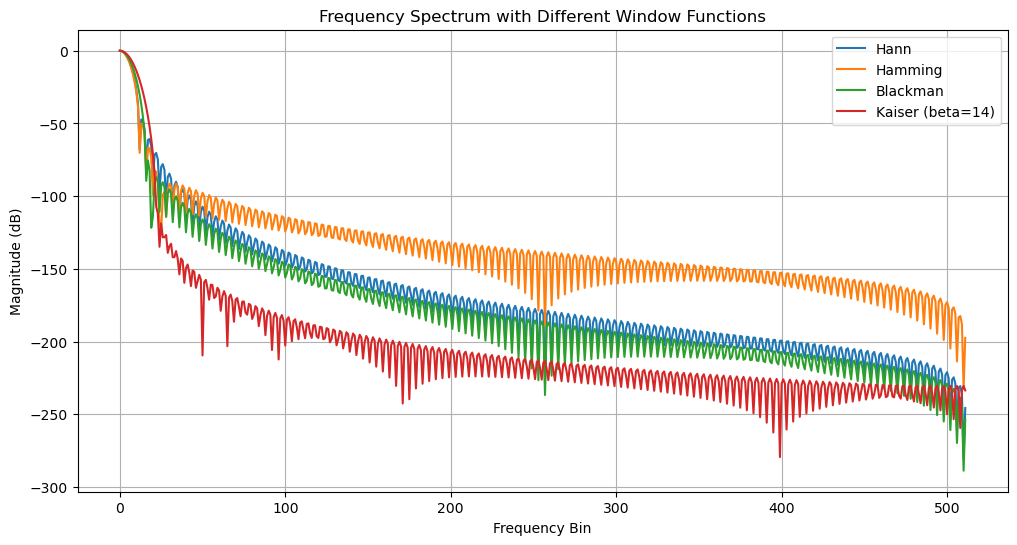

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_window_spectrum(window, window_name, N):
    fft_size = 1024  # FFT size
    windowed_signal = window * np.hanning(N)  # Apply the window to a Hanning windowed signal
    spectrum = np.fft.fft(windowed_signal, n=fft_size)
    spectrum = np.abs(spectrum[:fft_size // 2])  # Take the magnitude of the first half of the FFT
    spectrum = 20 * np.log10(spectrum / spectrum.max())  # Convert to dB scale
    plt.plot(spectrum, label=window_name)  # Plot the spectrum

N = 256  # Window length
windows = {
    'Hann': np.hanning(N),
    'Hamming': np.hamming(N),
    'Blackman': np.blackman(N),
    'Kaiser (beta=14)': np.kaiser(N, 14)
}

plt.figure(figsize=(12, 6))
for name, window in windows.items():
    plot_window_spectrum(window, name, N)

plt.xlabel('Frequency Bin')
plt.ylabel('Magnitude (dB)')
plt.title('Frequency Spectrum with Different Window Functions')
plt.legend()
plt.grid(True)
plt.show()


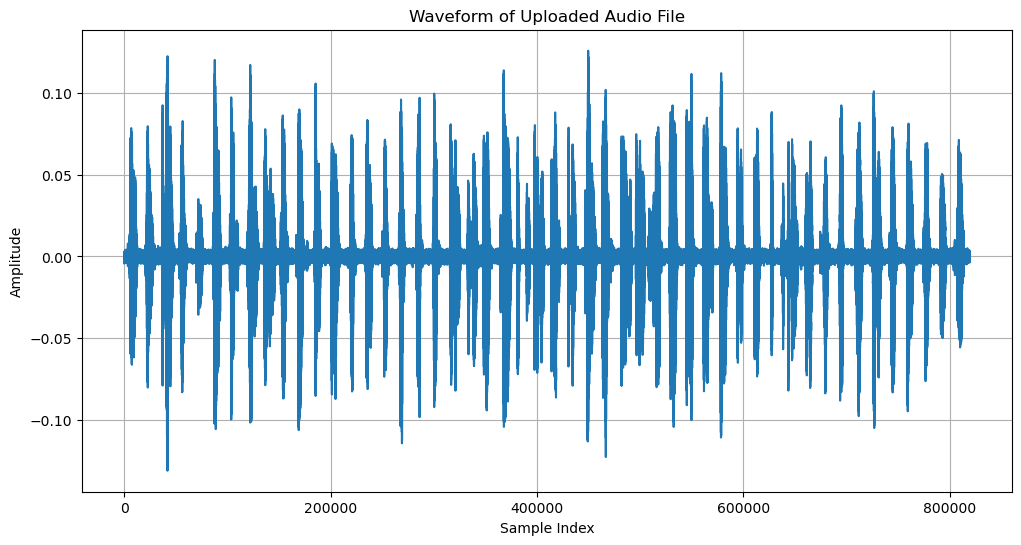

In [11]:
#"C:\Users\12240\BCI\output\a2a\HB02\sample_1_HB02.png.wav"
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wav

# Load the WAV file
file_path = r'C:\Users\12240\BCI\output\a2a\HB02\sample_1_HB02.png.wav'
sample_rate, data = wav.read(file_path)

# Plot the waveform
plt.figure(figsize=(12, 6))
plt.plot(data)
plt.title('Waveform of Uploaded Audio File')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


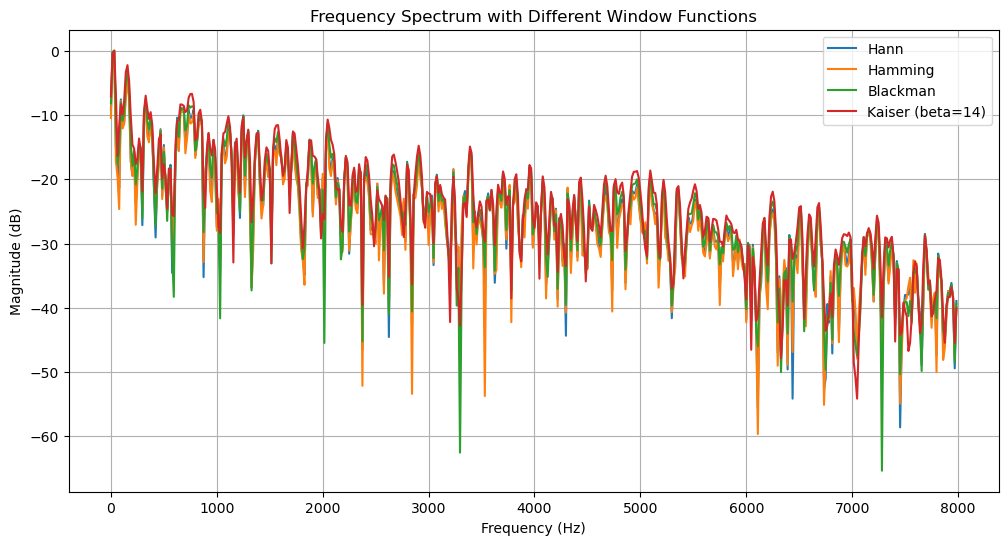

In [5]:
#'C:\Users\12240\BCI\output\a2a\HB02\sample_1_HB02.png.wav'
import numpy as np
import matplotlib.pyplot as plt
import torch
import scipy.io.wavfile as wav

# Define function to plot windowed spectrum
def plot_windowed_spectrum(data, window, sample_rate, window_name):
    N = len(data)
    fft_size = 1024  # FFT size
    windowed_signal = data * window  # Apply the window to the signal
    spectrum = np.fft.fft(windowed_signal, n=fft_size)
    spectrum = np.abs(spectrum[:fft_size // 2])  # Take the magnitude of the first half of the FFT
    freqs = np.fft.fftfreq(fft_size, 1/sample_rate)[:fft_size // 2]
    plt.plot(freqs, 20 * np.log10(spectrum / spectrum.max()), label=window_name)

# Load the WAV file
file_path = r'C:\Users\12240\BCI\output\a2a\HB02\sample_1_HB02.png.wav' 
sample_rate, data = wav.read(file_path)

# Ensure the data is a single channel (mono)
if len(data.shape) > 1:
    data = data[:, 0]

# Define the windows
N = 1024  # Window length
hann_window = torch.hann_window(N, periodic=False).numpy()
hamming_window = torch.hamming_window(N, periodic=False).numpy()
blackman_window = torch.blackman_window(N, periodic=False).numpy()
kaiser_window = torch.kaiser_window(N, beta=14, periodic=False).numpy()

# Plot the spectrum with different windows
plt.figure(figsize=(12, 6))
plot_windowed_spectrum(data[:N], hann_window, sample_rate, 'Hann')
plot_windowed_spectrum(data[:N], hamming_window, sample_rate, 'Hamming')
plot_windowed_spectrum(data[:N], blackman_window, sample_rate, 'Blackman')
plot_windowed_spectrum(data[:N], kaiser_window, sample_rate, 'Kaiser (beta=14)')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Frequency Spectrum with Different Window Functions')
plt.legend()
plt.grid(True)
plt.show()


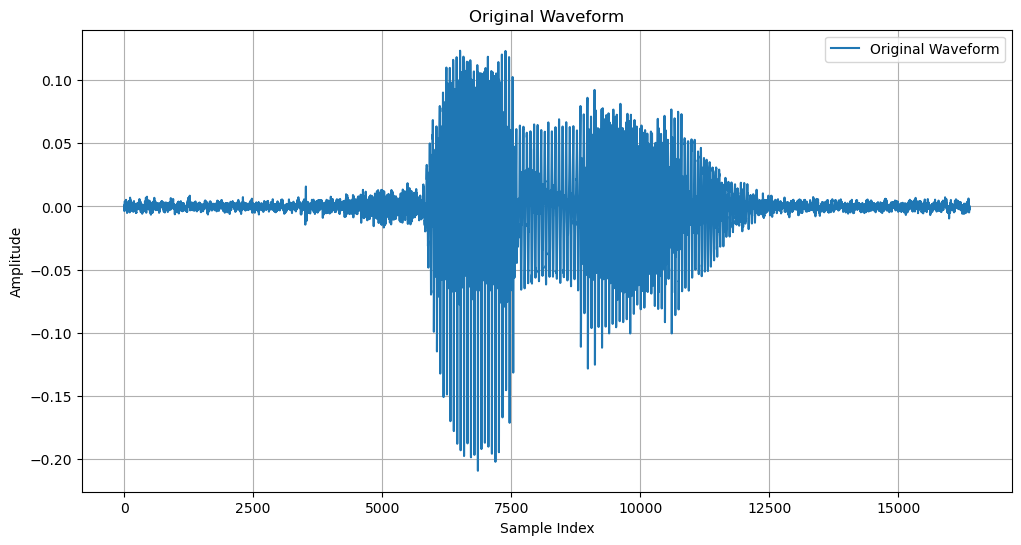

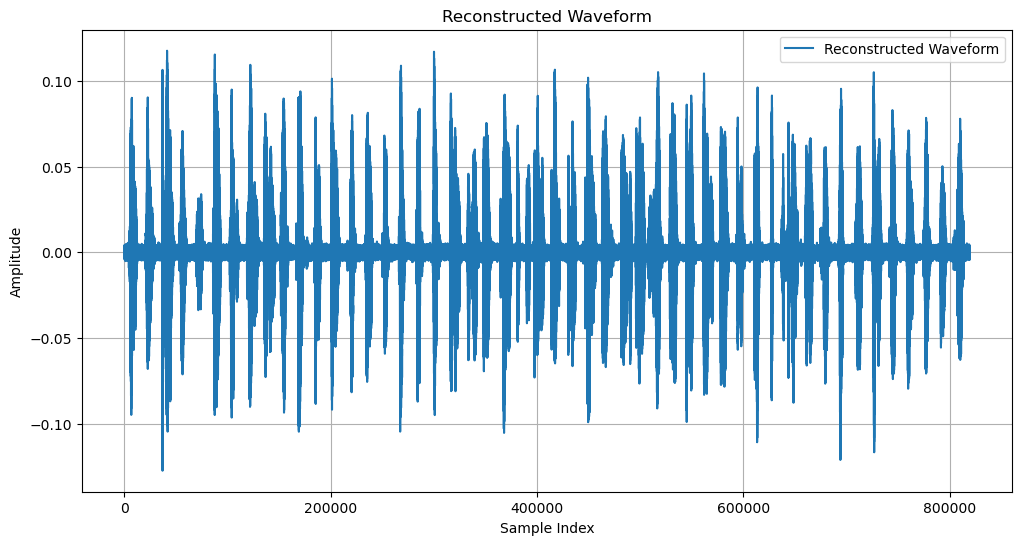

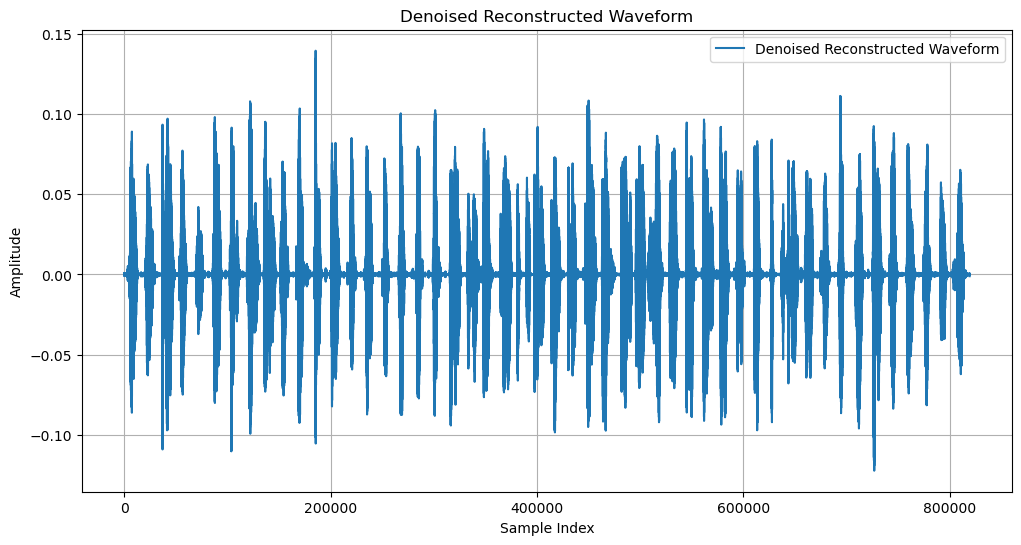

In [1]:
#Analysis "C:\Users\12240\BCI\output\a2a\HB02\sample_1_HB02.png_sample_npy_1.npy"
import numpy as np
import matplotlib.pyplot as plt

# Load the uploaded .npy file
file_path = r"C:\Users\12240\BCI\output\a2a\HB02_3d_swin\sample_1_HB02.png_sample_npy_1.npy"
data = np.load(file_path, allow_pickle=True).item()

# Extract different waveforms
wave_org = data['wave_org']
wave_rec = data['wave_rec']
wave_rec_denoise = data['wave_rec_denoise']

# Plot the original waveforms
plt.figure(figsize=(12, 6))
plt.plot(wave_org[0, 0, :], label='Original Waveform')
plt.title('Original Waveform')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Plot the reconstructed waveforms
plt.figure(figsize=(12, 6))
plt.plot(wave_rec, label='Reconstructed Waveform')
plt.title('Reconstructed Waveform')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Plot the denoised reconstructed waveforms
plt.figure(figsize=(12, 6))
plt.plot(wave_rec_denoise, label='Denoised Reconstructed Waveform')
plt.title('Denoised Reconstructed Waveform')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


# Converse .mat .lab .wav file to .h5 file

In [1]:
import h5py
import numpy as np

metadata = h5py.File(r'./example_data/LD20221104.h5', 'r')
for key in metadata.keys():
    print(key, metadata[key].shape)

TestNum_cum (1,)
ecog_alldataset (392050, 64)
end_ind_re_valid_alldataset (70,)
formant_re_alldataset (78410, 6)
intensity_re_alldataset (78410,)
label_alldataset (70,)
noisesample_re_alldataset (256,)
pitch_re_alldataset (78410,)
start_ind_re_valid_alldataset (70,)
wave_re_alldataset (6272800, 1)
wave_re_spec_alldataset (49007, 256)
wave_re_spec_amp_alldataset (49007, 256)


In [35]:
import h5py
import numpy as np

h5_file_path = r'./example_data/LD20.h5'
metadata = h5py.File(h5_file_path, 'r')
num_rows_to_print = 3

for key in metadata.keys():
    dataset = metadata[key]
    print(f"Dataset '{key}': shape {dataset.shape}")
    if isinstance(dataset, h5py.Dataset) and dataset.ndim > 0:
        data_to_print = dataset[:num_rows_to_print]
        print(f"First {num_rows_to_print} rows of dataset '{key}':")
        print(data_to_print)
    print()
metadata.close()

Dataset 'wave_re_alldataset': shape (6272800, 1)
First 3 rows of dataset 'wave_re_alldataset':
[[-0.00084005]
 [-0.00086565]
 [-0.0005037 ]]



In [10]:
import os
from pathlib import Path
import h5py
import numpy as np

def read_lab_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    labels = []
    for line in lines:
        parts = line.strip().split()
        if len(parts) == 2:
            _, label = parts
            labels.append(label)
        elif len(parts) == 3:
            _, _, label = parts
            labels.append(label)
    return labels

def save_labels_to_h5(lab_file: Path, h5_file_path: Path):
    labels = read_lab_file(lab_file)
    labels_array = np.array(labels, dtype='S')
    with h5py.File(h5_file_path, 'w') as h5_file:
        h5_file.create_dataset('label_alldataset', data=labels_array)
        print(f"Saved {len(labels)} labels from {lab_file} to {h5_file_path}")
lab_file = Path('./example_data/2022_11_04/KeywordReading_Overt_R01_trials.lab') 
h5_file_path = Path('./example_data/LD20221104.h5') 
save_labels_to_h5(lab_file, h5_file_path)

Saved 70 labels from example_data\2022_11_04\KeywordReading_Overt_R01_trials.lab to example_data\LD20221104.h5


In [23]:
import os
from pathlib import Path
import h5py
import numpy as np

def read_lab_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    timings = []
    for line in lines:
        parts = line.strip().split('\t')
        if len(parts) >= 2:
            start_time = float(parts[0])
            end_time = float(parts[1])
            timings.append((start_time, end_time))
    return timings

def save_indices_to_h5(lab_file: Path, h5_file_path: Path, target_fs: int):
    timings = read_lab_file(lab_file)
    start_indices = []
    end_indices = []
    for start_time, end_time in timings:
        start_idx = int(start_time * target_fs)
        end_idx = int(end_time * target_fs)
        start_indices.append(start_idx)
        end_indices.append(end_idx)
    with h5py.File(h5_file_path, 'a') as h5_file:
        h5_file.create_dataset('start_ind_re_valid_alldataset', data=np.array(start_indices))
        h5_file.create_dataset('end_ind_re_valid_alldataset', data=np.array(end_indices))
        print(f"Saved indices to {h5_file_path}")
lab_file = Path('./example_data/2022_11_04/KeywordReading_Overt_R01_trials.lab')  
h5_file_path = Path('./example_data/LD20.h5')  
target_sample_rate = 125
save_indices_to_h5(lab_file, h5_file_path, target_sample_rate)

OSError: Unable to create file (file exists)

In [12]:
import numpy as np
from scipy.io import loadmat
import h5py
from pathlib import Path

def load_and_standardize_ecog(ecog_file: Path, h5_file_path: Path):
    data = loadmat(ecog_file)
    ecog_data = data['ecog']
    print(f"File: {ecog_file.name}, Shape: {ecog_data.shape}")
    mean_vals = np.mean(ecog_data, axis=0)
    std_vals = np.std(ecog_data, axis=0)
    standardized_ecog = (ecog_data - mean_vals) / std_vals
    with h5py.File(h5_file_path, 'a') as h5_file:
        if 'ecog_alldataset' in h5_file:
            append_to_h5_dataset(h5_file['ecog_alldataset'], standardized_ecog)
        else:
            h5_file.create_dataset('ecog_alldataset', data=standardized_ecog, maxshape=(None, ecog_data.shape[1]), chunks=True)

def append_to_h5_dataset(dataset, data):
    new_shape = (dataset.shape[0] + data.shape[0],) + dataset.shape[1:]
    dataset.resize(new_shape)
    dataset[-data.shape[0]:] = data
ecog_root = Path('./example_data/2022_11_04/2022_11_04_KeywordReading_Overt.mat')
h5_file_path = Path('./example_data/LD20221104.h5')  
load_and_standardize_ecog(ecog_root, h5_file_path)

File: 2022_11_04_KeywordReading_Overt.mat, Shape: (392050, 64)


In [34]:
import h5py
import numpy as np
from scipy.io.wavfile import read

def add_wav_to_h5(wav_filename, h5_filename, dataset_name='wave_re_alldataset'):
    sr, wave_data = read(wav_filename)
    if wave_data.dtype != np.float32:
        wave_data = wave_data.astype(np.float32)
        wave_data = wave_data / np.max(np.abs(wave_data))  
    wave_data = wave_data.reshape(-1, 1)
    with h5py.File(h5_filename, 'a') as file:
        if dataset_name in file:
            del file[dataset_name]
        file.create_dataset(dataset_name, data=wave_data)
    
    print(f"Audio data from {wav_filename} added to {h5_filename} under dataset '{dataset_name}'.")
wav_filename = './example_data/2022_11_04/KeywordReading_Overt_R01.wav'  
h5_filename = './example_data/LD20.h5' 
add_wav_to_h5(wav_filename, h5_filename)

Audio data from ./example_data/2022_11_04/KeywordReading_Overt_R01.wav added to ./example_data/LD20.h5 under dataset 'wave_re_alldataset'.


In [14]:
import h5py
import numpy as np

with h5py.File('./example_data/LD20221104.h5', 'a') as file:
    if 'TestNum_cum' in file:
        del file['TestNum_cum']  
    file.create_dataset('TestNum_cum', data=np.array([10], dtype=np.int32))
print("Added 'TestNum_cum' dataset with value 10 to 'example.h5'.")

Added 'TestNum_cum' dataset with value 10 to 'example.h5'.


In [5]:
import h5py
import numpy as np
from scipy.io.wavfile import write

h5_filename = './example_data/HB02.h5' 
output_wav_filename = './example_data/output.wav'
sample_rate = 16000  

with h5py.File(h5_filename, 'r') as file:
    wave_data = file['wave_re_alldataset'][:]

print("Wave data shape:", wave_data.shape)
wave_data = np.asarray(wave_data, dtype=np.float32)
wave_data = wave_data / np.max(np.abs(wave_data)) 
audio_data = np.int16(wave_data * 32767)
write(output_wav_filename, sample_rate, audio_data)
print(f"Audio data saved to {output_wav_filename}")

Wave data shape: (21641600, 1)
Audio data saved to ./example_data/output.wav


In [1]:
import torch
import torchaudio

def wave2spec(
    wave,
    n_fft=511,  
    wave_fr=16000,
    spec_fr=125,
    noise_db=-60,
    max_db=35,
    to_db=True,
    power=2,
    device='cpu'
):
    if wave.dim() == 1:
        wave = wave.unsqueeze(0)  #  (1, num_samples)

    num_samples = wave.size(-1)
    if num_samples < n_fft:
        padding = n_fft - num_samples
        wave = torch.nn.functional.pad(wave, (0, padding))
    spec_transform = torchaudio.transforms.Spectrogram(
        n_fft=n_fft,
        win_length=n_fft,
        hop_length=int(wave_fr / spec_fr),
        power=power
    ).to(device)  
    wave = wave.to(device, dtype=torch.float64)  
    spec = spec_transform(wave)
    if to_db:
        spec_db = torchaudio.transforms.AmplitudeToDB()(
            spec
        ).clamp(min=noise_db, max=max_db)
        return ((spec_db - noise_db) / (max_db - noise_db) * 2 - 1).transpose(-2, -1).squeeze(0)
    else:
        return spec.transpose(-2, -1).squeeze(0)

waveform, sample_rate = torchaudio.load("/kaggle/input/ssssssss/KeywordReading_Overt_R01.wav")
waveform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)(waveform)
wave_re_spec = wave2spec(waveform, to_db=True)
wave_re_spec_amp = wave2spec(waveform, to_db=False)

print('Log Spectrogram shape:', wave_re_spec.shape)
print(wave_re_spec[:10])
print('Linear Spectrogram shape:', wave_re_spec_amp.shape)
print(wave_re_spec_amp[:10])
with h5py.File('/kaggle/working/LD20221104_copy.h5', 'w') as f:
    f.create_dataset('wave_re_spec_alldataset_test', data=wave_re_spec.cpu().numpy())
    f.create_dataset('wave_re_spec_amp_alldataset_test', data=wave_re_spec_amp.cpu().numpy())
print("Data saved to spectrogram_data.h5")

KeyboardInterrupt: 

In [ ]:
import h5py
import shutil
import os

def copy_datasets(source_file, destination_file, destination_group='/'):
    with h5py.File(source_file, 'r') as src, h5py.File(destination_file, 'a') as dst:
        for dataset_name in src.keys():
            if dataset_name in dst[destination_group]:
                del dst[destination_group][dataset_name]
            src.copy(dataset_name, dst[destination_group])

file1_path = './example_data/LD20221104.h5'
file2_path = './example_data/LD20221104_copy.h5'
merged_file_path = './example_data/LD202.h5'
if os.path.exists(merged_file_path):
    os.remove(merged_file_path)
shutil.copy(file1_path, merged_file_path)

copy_datasets(file2_path, merged_file_path)


In [3]:
import torch

# 使用 map_location 参数将模型映射到 CPU
file_path = r'C:\Users\12240\Desktop\model_epoch0.pth'
data = torch.load(file_path, map_location=torch.device('cpu'))
print(type(data))
if isinstance(data, dict):
    print("Keys in the .pth file:", data.keys())
    if 'state_dict' in data:
        state_dict = data['state_dict']
        print("State_dict keys:", state_dict.keys())
    else:
        print(data)
elif isinstance(data, torch.nn.Module):
    print("Model's state_dict:")
    print(data.state_dict().keys())
else:
    print(data)

<class 'dict'>
Keys in the .pth file: dict_keys(['models', 'auxiliary'])
{'models': {'encoder': OrderedDict([('formant_bandwitdh_bias', tensor([0.])), ('formant_bandwitdh_slop', tensor([0.])), ('formant_bandwitdh_thres', tensor([0.])), ('amplifier', tensor([1.])), ('bias', tensor([-50.])), ('conv1_mel.weight', tensor([[[-0.0383, -0.0688, -0.1637],
         [ 0.0611, -0.1580, -0.0251],
         [ 0.0355,  0.0946,  0.0648],
         ...,
         [-0.0560, -0.0465,  0.0259],
         [-0.0005, -0.0195,  0.0405],
         [-0.0396, -0.0572, -0.1383]],

        [[-0.0492,  0.0922, -0.0465],
         [ 0.0012, -0.1333,  0.0719],
         [-0.0036, -0.0683,  0.0348],
         ...,
         [ 0.0293,  0.0011, -0.0867],
         [-0.0006,  0.0469,  0.0445],
         [ 0.1416,  0.0289,  0.0308]],

        [[-0.0555, -0.0405, -0.0232],
         [ 0.0727, -0.0882,  0.0467],
         [ 0.0410,  0.0127, -0.0603],
         ...,
         [ 0.0789,  0.0225, -0.0309],
         [ 0.0830,  0.0698,  0.032

STOI of audio1: 0.14
STOI of audio2: 0.13


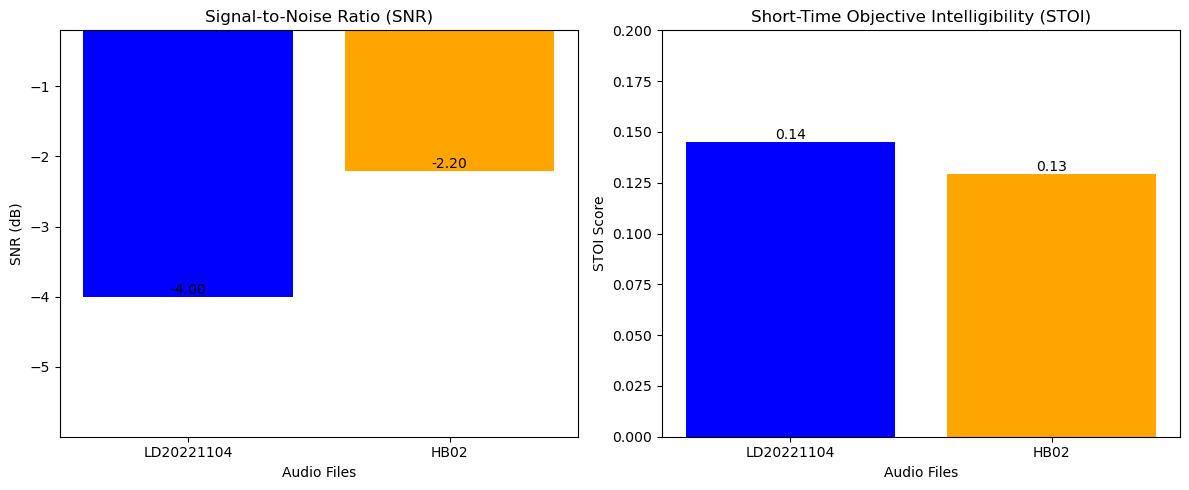

In [4]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from pystoi import stoi

y1, sr1 = librosa.load('./example_data/2022_11_04/KeywordReading_Overt_R01.wav', sr=16000)
y2, sr2 = librosa.load('./example_data/output from HB02.wav', sr=16000)

assert sr1 == sr2, "Sampling rates are different!"

min_length = min(len(y1), len(y2))
y1 = y1[:min_length]
y2 = y2[:min_length]

def calculate_snr(signal1, signal2):
    signal_power = np.mean(signal1 ** 2)
    noise_power = np.mean((signal1 - signal2) ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

snr1 = calculate_snr(y1, y2)
snr2 = calculate_snr(y2, y1)

stoi_score1 = stoi(y1, y2, sr1)
stoi_score2 = stoi(y2, y1, sr2)

print(f"STOI of audio1: {stoi_score1:.2f}")
print(f"STOI of audio2: {stoi_score2:.2f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
bars_snr = plt.bar(['LD20221104', 'HB02'], [snr1, snr2], color=['blue', 'orange'])
plt.title('Signal-to-Noise Ratio (SNR)')
plt.ylabel('SNR (dB)')
plt.ylim(min(snr1, snr2) - 2, max(snr1, snr2) + 2)
plt.xlabel('Audio Files')

for bar, snr in zip(bars_snr, [snr1, snr2]):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{snr:.2f}', ha='center', va='bottom')

plt.subplot(1, 2, 2)
bars_stoi = plt.bar(['LD20221104', 'HB02'], [stoi_score1, stoi_score2], color=['blue', 'orange'])
plt.title('Short-Time Objective Intelligibility (STOI)')
plt.ylabel('STOI Score')
plt.ylim(0, 0.2) 
plt.xlabel('Audio Files')

for bar, stoi_score in zip(bars_stoi, [stoi_score1, stoi_score2]):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{stoi_score:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('./example_data/audio_comparison.jpg') 
plt.show()


In [2]:
import h5py

with h5py.File(r'./example_data\LD20221104.h5', 'r') as file:
    labels = file['label_alldataset'][:]
    print(labels)

[b'Right' b'Down' b'SILENCE' b'Up' b'Left' b'Enter' b'Back' b'Right'
 b'Down' b'Enter' b'Left' b'SILENCE' b'Back' b'Up' b'Right' b'Back' b'Up'
 b'Down' b'Enter' b'Left' b'SILENCE' b'Left' b'Down' b'Right' b'Enter'
 b'Back' b'SILENCE' b'Up' b'Up' b'Right' b'Left' b'SILENCE' b'Back'
 b'Enter' b'Down' b'Enter' b'Up' b'Down' b'Left' b'SILENCE' b'Right'
 b'Back' b'Down' b'Right' b'Enter' b'Back' b'Left' b'SILENCE' b'Up'
 b'Right' b'Back' b'Left' b'Down' b'Enter' b'SILENCE' b'Up' b'Right'
 b'Left' b'Enter' b'Up' b'SILENCE' b'Back' b'Down' b'Back' b'Enter'
 b'SILENCE' b'Right' b'Down' b'Up' b'Left']


In [5]:
import random

words = [
b'Right', b'Down', b'SILENCE', b'Up', b'Left', b'Enter', b'Back', b'Right',
b'Down', b'Enter', b'Left', b'SILENCE', b'Back', b'Up', b'Right', b'Back', b'Up',
b'Down', b'Enter', b'Left', b'SILENCE', b'Left', b'Down', b'Right', b'Enter',
b'Back', b'SILENCE', b'Up', b'Up', b'Right', b'Left', b'SILENCE', b'Back',
b'Enter', b'Down', b'Enter', b'Up', b'Down', b'Left', b'SILENCE', b'Right',
b'Back', b'Down', b'Right', b'Enter', b'Back', b'Left', b'SILENCE', b'Up',
b'Right', b'Back', b'Left', b'Down', b'Enter', b'SILENCE', b'Up', b'Right',
b'Left', b'Enter', b'Up', b'SILENCE', b'Back', b'Down', b'Back', b'Enter',
b'SILENCE', b'Right', b'Down', b'Up', b'Left'
]

unique_words = list(set(words))
random.shuffle(unique_words)
group1 = unique_words[:3]
group2 = unique_words[4:7]
print("Group 1:", group1)
print("Group 2:", group2)

Group 1: [b'Enter', b'Up', b'Down']
Group 2: [b'Back', b'Left', b'Right']


In [ ]:
import h5py
import numpy as np

group_indices = {
    'group1': [b'glasses', b'bus', b'gun', b'balloon', b'cow', b'watch', b'envelope', b'arrow', b'drum', b'gloves', b'moon'],
    'group2': [b'box', b'button', b'key', b'umbrella', b'hammer', b'heart', b'house', b'cat', b'crown', b'ladder'],
    'group3': [b'knife', b'lock', b'couch', b'bed', b'table', b'leg', b'toe', b'nose', b'dog', b'airplane'],
    'group4': [b'pencil', b'bee', b'grapes', b'kite', b'bell', b'fork', b'duck', b'vase', b'mouse', b'sheep', b'violin', b'e', b'bread', b'socks', b'flag', b'ball', b'well', b'cake', b'window', b'hat']
}
with h5py.File('./example_data/HB02.h5', 'r') as h5f:
    labels = h5f['label_alldataset'][:]
    start_inds = h5f['start_ind_re_valid_alldataset'][:]
    end_inds = h5f['end_ind_re_valid_alldataset'][:]
    other_datasets = {
        'ecog_alldataset': h5f['ecog_alldataset'][:],
        'formant_re_alldataset': h5f['formant_re_alldataset'][:],
        'intensity_re_alldataset': h5f['intensity_re_alldataset'][:],
        'pitch_re_alldataset': h5f['pitch_re_alldataset'][:],
        'wave_re_alldataset': h5f['wave_re_alldataset'][:],
        'wave_re_spec_alldataset': h5f['wave_re_spec_alldataset'][:],
        'wave_re_spec_amp_alldataset': h5f['wave_re_spec_amp_alldataset'][:],
        'noisesample_re_alldataset': h5f['noisesample_re_alldataset'][:]
    }
    for group_name, group_words in group_indices.items():
        group_label_indices = [i for i, label in enumerate(labels) if label in group_words]
        with h5py.File(f'{group_name}_HB02.h5', 'w') as new_h5f:
            new_h5f.create_dataset('label_alldataset', data=labels[group_label_indices])
            new_h5f.create_dataset('start_ind_re_valid_alldataset', data=start_inds[group_label_indices])
            new_h5f.create_dataset('end_ind_re_valid_alldataset', data=end_inds[group_label_indices])
            for dataset_name, dataset_data in other_datasets.items():
                new_h5f.create_dataset(dataset_name, data=dataset_data[:])


In [ ]:
import h5py
import numpy as np

group_indices = {
    'group1': [b'Enter', b'Up', b'Down'],
    'group2': [b'Back', b'Left', b'Right'],
}
with h5py.File('./example_data/LD20221104.h5', 'r') as h5f:
    labels = h5f['label_alldataset'][:]
    start_inds = h5f['start_ind_re_valid_alldataset'][:]
    end_inds = h5f['end_ind_re_valid_alldataset'][:]
    other_datasets = {
        'ecog_alldataset': h5f['ecog_alldataset'][:],
        'formant_re_alldataset': h5f['formant_re_alldataset'][:],
        'intensity_re_alldataset': h5f['intensity_re_alldataset'][:],
        'pitch_re_alldataset': h5f['pitch_re_alldataset'][:],
        'wave_re_alldataset': h5f['wave_re_alldataset'][:],
        'wave_re_spec_alldataset': h5f['wave_re_spec_alldataset'][:],
        'wave_re_spec_amp_alldataset': h5f['wave_re_spec_amp_alldataset'][:],
        'noisesample_re_alldataset': h5f['noisesample_re_alldataset'][:]
    }
    for group_name, group_words in group_indices.items():
        group_label_indices = [i for i, label in enumerate(labels) if label in group_words]
        with h5py.File(f'{group_name}_LD20221104.h5', 'w') as new_h5f:
            new_h5f.create_dataset('label_alldataset', data=labels[group_label_indices])
            new_h5f.create_dataset('start_ind_re_valid_alldataset', data=start_inds[group_label_indices])
            new_h5f.create_dataset('end_ind_re_valid_alldataset', data=end_inds[group_label_indices])
            for dataset_name, dataset_data in other_datasets.items():
                new_h5f.create_dataset(dataset_name, data=dataset_data[:])

In [1]:
import h5py
import numpy as np

def merge_h5_files(output_file, *input_files):
    with h5py.File(output_file, 'w') as output_h5:
        datasets = {}
        for file in input_files:
            with h5py.File(file, 'r') as input_h5:
                for dataset_name in input_h5.keys():
                    input_data = input_h5[dataset_name][:]
                    
                    if dataset_name in datasets:
                        existing_data = datasets[dataset_name]
                        if not np.array_equal(existing_data, input_data):
                            combined_data = np.concatenate((existing_data, input_data), axis=0)
                            datasets[dataset_name] = combined_data
                    else:
                        datasets[dataset_name] = input_data
        for dataset_name, data in datasets.items():
            output_h5.create_dataset(dataset_name, data=data)
            
    print(f"Files merged and saved to {output_file}")
merge_h5_files('merged_output.h5', r"C:\Users\12240\BCI\example_data\group2_HB02.h5", r"C:\Users\12240\BCI\example_data\group3_HB02.h5", r"C:\Users\12240\BCI\example_data\group4_HB02.h5")


Files merged and saved to merged_output.h5
